### TMA4215 Numerisk Matematikk 

Høst 2021 – September 16, 2021

# Project 1: Newton Iteration

### Notes

This project is an individual project and should be solved that way. You can discuss the problems, but you should write the solutions _in your own words_.

All code – also the tests – should be in individual cells that can just be run (as soon as the necessary functions are defined). Functions should only be used in cells _after_ their definition, such that an evaltuation in order of the notebook does not yield errors.

The notebook with the answers should be uploaded in inspera.

The project is obligatory and counts 10% on the final grade.

### Submission Deadline
Tuesday, October 5, 2021, 23:59.

## Introduction
This project considers the Newton iteration for the $n$-dimensional nonlinear equation

$$ \mathbf F(\mathbf x) = \mathbf 0, $$

i.e. $\mathbf F\colon \mathbb R^n \to \mathbb R^n$. For the first two problems, we will consider the multivariate case. For the implementation, we stay with $n=1$.

## Problem 1

1. Compute the gradient $\nabla F$ and the Hessian $H_F$ of the Rosenbrock function $F\colon \mathbb R^2 \to \mathbb R$ defined by $F(\mathbf x) = 100(x_2-x_1^2)^2 + (1-x_1)^2$.
   Show that $\mathbf x^* = (1,1)^\mathrm{T}$ is the only local minimizer of this function and that the Hessian matrix at this point is positive definite.

**1.1**

$$\nabla\textbf{F}=(\frac{\partial F}{\partial{x_1}},\frac{\partial F}{\partial{x_2}})^T = (-400x_1(x_2-x_1^2)-2(1-x_1),200(x_2-x_1^2))^T $$


$$
\nabla^2\textbf{F}= \begin{pmatrix}
   -400x_2+1200x_1+2 & -400x_1 \\
  -400x_1 &  200 
\end{pmatrix}
$$

From the theorem of second order sufficient conditions we need that $\nabla\textbf{F}(\textbf{x}^*)=0$ and $\nabla^2\textbf{F}(\textbf{x}^*$) is positive definite for $\textbf{x}^*$ to be the only local minimizer.


$\nabla\textbf{F}(\textbf{x}^*)=0 \implies $

$1)\space -400x_1(x_2-x_1^2)-2(1-x_1)=0$

$2)\space 200(x_2 - x_1)^2 = 0$

From 1) we get that $x_2=x_1^2$. Inserting this into 2) we get

$-400x_1(x_1^2-x_1^2)-2(1-x_1)=0$

$-2+2x_1=0$

$x_1=\frac{2}{2}$

$\implies x_1=1 \implies x_2=1^2=1 \implies \textbf x^*=(1,1)^T$ 

To show that the Hessian is positive definite, we can first notice that it is symmetric. A symmetric matrix M is positive definite if the eigenvalues are real and positive. The eigenvalues of the Hessian in the point $\textbf{x}^*$ are as follows:

$det(\nabla^2\textbf{F}(\textbf{x}^*)-\lambda I) = det(\nabla^2\textbf{F}(1,1)-\lambda I)=$

$$
det \begin{pmatrix}
   802-\lambda & -400 \\
  -400 &  200 -\lambda
\end{pmatrix}
$$

$ =(802-\lambda)(200-\lambda)-160000 $

$=\lambda ^2-1002\lambda +400$.

Using the abc-formula, this equals zero for $\lambda_1 \approx 1001.5,\lambda_2 \approx 0.5 $, two real and positive values. $\implies$ the Hessian is positive definite in the point $\textbf{x}^*.$

2. Show that the function $G\colon \mathbb R^2 \to \mathbb R$ defined by $G(\mathbf x) = 8x_1 + 12x_2 + x_1^2-2x_2^2$ has one stationary point which is neither a maximum nor a minimum.

**1.2**

Any point $\textbf{x}^*$ where $\nabla\textbf{G}(\textbf{x}^*)=\textbf{0}$ is called a stationary point. I will therefore find this point, and then show that it is a saddle point.

$\nabla\textbf{G}=(\frac{\partial \textbf{G}}{\partial x_1}, \frac{\partial \textbf{G}}{\partial x_2})^T=$

$(8+2x_i,12-4x_2)^T$.

This is $\textbf{0}$ for $x_1=-4, x_2=3 \implies \textbf{x}^*=(-4,3)$.

To find out whether or not this is a saddle point, we may compute the discriminant of the funciton, i.e:

$D=\frac{\partial^2G}{\partial x_1^2}\frac{\partial^2G}{\partial x_2^2}-\frac{\partial^2G}{\partial x_1x_2} = -8 < 0$. 

This means that $\textbf{x}^*$ is a saddle point, and therefore not a local minimum or maximum. 

3. Use `matplotlib`s `pyplot` to plot `contour` plots on the unit square $\Omega_1 = [-1,1]^2$ for $F_1$ and on the unit square $\Omega_2 = [-10,10]^2$ for $G$.

In [1]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

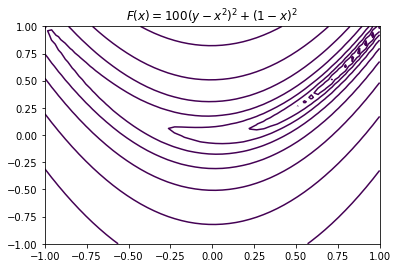

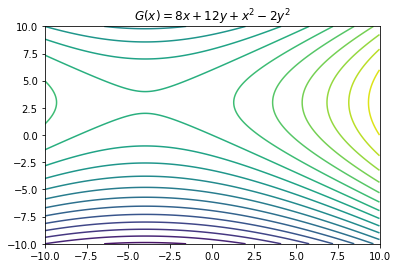

In [2]:
#Defining the function F(x,y) as described in the text
def F(x,y):
    return 100*(y-x**2)**2+(1-x)**2
    
#Defining the function G(x,y) as described in the text 
def G(x,y):
    return 8*x+12*y+x**2-2*y**2

#Omega_1=[-1,1]^2
O1_x=np.linspace(-1,1,50) # 50 evenly spaced points between -1 and 1
O1_y=np.linspace(-1,1,50) # 50 evenly spaced points between -1 and 1
X1,Y1=np.meshgrid(O1_x,O1_y) 

#Omega_2=[-10,10]^2
O2_x=np.linspace(-10,10,500) # 500 evenly spaced points between -10 and 10
O2_y=np.linspace(-10,10,500) # 500 evenly spaced points between -10 and 10
X2,Y2=np.meshgrid(O2_x,O2_y)

#Creating plots
plt.contour(O1_x,O1_y, F(X1,Y1),np.logspace(-10,10,50))
plt.title(r"$F(x)=100(y-x^2)^2+(1-x)^2$")
plt.show()

plt.contour(O2_x,O2_y,G(X2,Y2),20)
plt.title(r"$G(x)=8x+12y+x^2-2y^2$")
plt.show()

## Problem 2

Let $A \in \mathbb R^{n \times n}$ be symmetric.
The Rayleigh quotient $F\colon \mathbb R^n \to \mathbb R$ for $A$ is defined as
    
$$ F(\mathbf x) = \frac{\mathbf x^T\! A \mathbf x}{\lVert \mathbf x\rVert_2^2}.$$

The goal of this problem is to analyze Newton's method for finding minimizer (or stationary points) $\mathbf x^\ast$ of $F$ or in other words zeros of the gradient $\nabla F(\mathbf x) = \mathbf 0$.

To this end:

1. Compute the gradient $\nabla F$.
2. What are the stationary points $\mathbf x^\ast$ of $F$? What is the value of $F(\mathbf x^\ast)$ then?
3. Show that the Hessian matrix $\nabla^2 F$ (i.e. the Jacobian of the Gradient $\nabla F$) satisfies
   
   $$\nabla^2 F(\mathbf x) = \frac{2}{\lVert \mathbf x \rVert_2^2}
	\Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)
    \Bigl(A - F(\mathbf x) I\Bigr)
    \Bigl(I - 2 \frac{\mathbf x \mathbf x^T}{\lVert \mathbf x \rVert_2^2}\Bigr)$$
   
   _Hint_: Start with the directional derivative into a direction $z$, i.e. $(\nabla^2 F(x))z$.
4. Assume during the iterations of a the _Newton Method_ descent we reach nearly an Eigenvector of $A$.
   Then for $\mathbf x$ an Eigenvector we are looking for a descent direction by solving the Newton equation
    
   $$\nabla^2 F(\mathbf x) \, d = - \nabla F(\mathbf x)$$
   
   To what does the solution of this equation simplify in this case?
5. What does the Newton iteration look like for the situation in 4?
6. Interpret the result from 5 and analyze what the reason for this behavior is.

**2.1** 

The gradient of $\textbf{x}^TA\textbf{x}$ was computed in assigment 2, so I will assume this one as known:

$\nabla (\textbf{x}^TA\textbf{x}) = (A^T+A)\textbf{x} = 2A\textbf{x}$, for symmetric matrix A. 

The gradient of $||\textbf{x}||_2^2$ is computed as follows:

Take the partial derivative with respect to the k-th value in $\textbf{x}$, to find the k-th component of the gradient and then combine: 

$\frac{\partial}{\partial x_k}(||\textbf{x}||_2^2)=$

$\frac{\partial}{\partial x_k}(\Sigma_{i=1}^n |x_i|^2 )= 2x_k$

$\implies \nabla (||\textbf{x}||_2^2)=2\textbf{x}$.

Now we can compute the gradient of $\textbf{F}(\textbf{x})$ using the quotient rule: 

$\nabla \textbf{F}(\textbf{x}) = \frac{2A\textbf{x}||\textbf{x}||_2^2-\textbf{x}^TA\textbf{x}2\textbf{x}}{(||\textbf{x}||_2^2)^2}$.

Rearranging and noticing that $\textbf{F}(\textbf{x})$ appears in the gradient, we get 

$\nabla \textbf{F}(\textbf{x}) = \frac{2}{||\textbf{x}||_2^2}(A-\textbf{F}(\textbf{x})I)\textbf{x}$

**2.2**

Stationary points when $\nabla\textbf{F}(\textbf{x}) = 0$:

$\frac{2}{||\textbf{x}||_2^2}(A-\textbf{F}(\textbf{x})I)\textbf{x} = 0$

$(A-\textbf{F}(\textbf{x})I)\textbf{x} = 0$

$A\textbf{x}-\textbf{F}(\textbf{x})I\textbf{x}=0$

$\implies$

$A\textbf{x}=\textbf{F}(\textbf{x})I\textbf{x}$

We see that the gradient is minimized for all $\textbf{x}^*$ that are eigenvectors of the matrix A. $\textbf{F}(\textbf{x}^*)$ is therefore the eigenvalues of A in these points. 

**2.3**

We know that every row in the Jacobian is $(\nabla \textbf{F})_k$ transposed, so we can use that to compute the Hessian of $\textbf{F}(\textbf{x})$:

$\nabla^2 \textbf{F} = J_F\left(\frac{2}{||\textbf{x}||_2^2}(A-\textbf{F}(\textbf{x})I)\textbf{x}\right) = J_F\left(\frac{2A\textbf{x}}{||\textbf{x}||_2^2}-\frac{2\textbf{F}(\textbf{x})I\textbf{x}}{||\textbf{x}||_2^2}\right)$

If we denote this as $J_F(C-D)$, we can first compute $J_F(C)$, then $J_F(D)$ and combine them to get the Hessian. 

$C$:

Using the quotient rule and factoring out 2A which is independent of $\textbf{x}$ we get that 

$2AJ_F\left(\frac{\textbf{x}}{||\textbf{x}||_2^2}\right)=2A\left(\frac{||\textbf{x}||_2^2-\textbf{x}2\textbf{x}^T}{||\textbf{x}||_2^4}\right)=\frac{2}{||\textbf{x}||_2^2}\left(A-\frac{2A\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} \right)$

$D$:

Here we can use the product rule, because we already know $\nabla \left(\frac{\textbf{x}}{||\textbf{x}||_2^2} \right)$ from computing $C$. We also know $\nabla\textbf{F}$ from before and we use the transposed:

$J_F\left(\frac{\textbf{x}}{||\textbf{x}||_2^2}2\textbf{F}(\textbf{x})I \right) = \left(\frac{||\textbf{x}||_2^2-\textbf{x}2\textbf{x}^T}{||\textbf{x}||_2^2} \right)2\textbf{F}(\textbf{x})I+\frac{2\textbf{x}}{||\textbf{x}||_2^2}\left( \frac{2\textbf{x}^T}{||\textbf{x}||_2^2}(A-\textbf{F}(\textbf{x})I)\right)=$

$\left[ \frac{2}{||\textbf{x}||_2^2}\left(\textbf{F}(\textbf{x})I - \frac{2\textbf{x}\textbf{x}^T\textbf{F}(\textbf{x})I}{||\textbf{x}||_2^2} \right) + \frac{2}{||\textbf{x}||_2^2} \left(\frac{2\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2}
(A-\textbf{F}(\textbf{x})I)\right) \right]$

$\implies$

$ J_F(C-D) = $

$\frac{2}{||\textbf{x}||_2^2}\left(A-\frac{2A\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} \right) - \left[ \frac{2}{||\textbf{x}||_2^2}\left(\textbf{F}(\textbf{x})I - \frac{2\textbf{x}\textbf{x}^T\textbf{F}(\textbf{x})I}{||\textbf{x}||_2^2} \right) + \frac{2}{||\textbf{x}||_2^2} \left(\frac{2\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2}
(A-\textbf{F}(\textbf{x})I)\right) \right]=$

$\frac{2}{||\textbf{x}||_2^2}\left(A-\frac{2A\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} - \textbf{F}(\textbf{x})I + \frac{2\textbf{x}\textbf{x}^T\textbf{F}(\textbf{x})I}{||\textbf{x}||_2^2}  -  \frac{2A\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} +\frac{2\textbf{x}\textbf{x}^T\textbf{F}(\textbf{x})I}{||\textbf{x}||_2^2} \right)$.

Now we can try to multiply out the Hessian given in the problem and see if we get the same expression: 

$\frac{2}{||\textbf{x}||_2^2}\left(I-\frac{2\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} \right) \Bigl( A-\textbf{F}(\textbf{x})I \Bigr) \left( I-\frac{2\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2}\right)=$

$\frac{2}{||\textbf{x}||_2^2}\left( A-\textbf{F}(\textbf{x})I-\frac{2\textbf{x}\textbf{x}^TA}{||\textbf{x}||_2^2} +\frac{2\textbf{F}(\textbf{x})I\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} \right)\left(I-\frac{2\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} \right)=$

$\frac{2}{||\textbf{x}||_2^2}\left(A-\textbf{F}(\textbf{x})I-\frac{2\textbf{x}\textbf{x}^TA}{||\textbf{x}||_2^2} +\frac{2\textbf{F}(\textbf{x})I\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} - \frac{2\textbf{x}\textbf{x}^TA}{||\textbf{x}||_2^2} +\frac{2\textbf{F}(\textbf{x})I\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} + \frac{4\textbf{x}\textbf{x}^TA\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^4} - \frac{4\textbf{x}\textbf{x}^T\textbf{F}(\textbf{x})I\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^4}\right)$.

Notice that the last two terms can be simplified, using that $\frac{\textbf{x}^TA\textbf{x}}{||\textbf{x}||_2^2}=\textbf{F}(\textbf{x})I$ and $||\textbf{x}||_2^2 = \textbf{x}^T\textbf{x}$: 

$ \frac{4\textbf{x}\textbf{x}^TA\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^4} - \frac{4\textbf{x}\textbf{x}^T\textbf{F}(\textbf{x})I\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^4}=$

$\frac{4\textbf{x}\textbf{F}(\textbf{x})I\textbf{x}^T}{||\textbf{x}||_2^2}-\frac{4\textbf{x}\textbf{F}(\textbf{x})I\textbf{x}^T}{||\textbf{x}||_2^2}$.

The last two terms cancel, which leaves us with exactly the computed Hessian. q.e.d.

**2.4**

Notice that when $\textbf{x}$ is an eigenvector we have from 2.2 that $\textbf{F}(\textbf{x})$ is minimized which implies that $\nabla \textbf{F}(\textbf{x}) = \textbf{0}$. 

$\implies$

$\nabla^2\textbf{F}(\textbf{x}) \textbf{d} = \textbf{0}$

$\frac{2}{||\textbf{x}||_2^2}\left(I-\frac{2\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} \right) \Bigl( A-\textbf{F}(\textbf{x})I \Bigr) \left( I-\frac{2\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2}\right) \textbf{d}=\textbf{0}$

$\frac{2}{||\textbf{x}||_2^2}\left(A-\frac{2A\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} - \textbf{F}(\textbf{x})I + \frac{2\textbf{x}\textbf{x}^T\textbf{F}(\textbf{x})I}{||\textbf{x}||_2^2}  -  \frac{2A\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} +\frac{2\textbf{x}\textbf{x}^T\textbf{F}(\textbf{x})I}{||\textbf{x}||_2^2} \right) = \textbf{0}$

Since $A\textbf{x}=\lambda\textbf{x}$ for points that are eigenvectors, this simplifies to

$\left(A-\lambda I - \frac{4A\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2} +  \frac{4\lambda I\textbf{x}\textbf{x}^T}{||\textbf{x}||_2^2}\right)=\textbf{0}$

$(A-\lambda I)\textbf{d} = \textbf{0}$

$A\textbf{d} = \lambda \textbf{d}$

This equation is true either when $\textbf{d} = \textbf{0}$, which is trivial, or when $\textbf{d}$ is an eigenvector. In this case, it must be the exact eigenvector $\textbf{x}$ for which we are evaluating the Newton equation.

$\implies$

$\textbf{d} = \textbf{x}$.

**2.5**

Newton iteration:

$\textbf{x}^{(k+1)}=\textbf{x}^{(k)}+\textbf{d}$,

where $\textbf{d}$ is found by evaluating the Newton equation in $\textbf{x}^{(k)}$ an eigenvector. 

$\implies$

$\textbf{x}^{(k+1)}=\textbf{x}^{(k)}+ \textbf{x}^{(k)}=2\textbf{x}^{(k)}$.

**2.6**

Behaviour of the iteration:

The iteration diverges since the length of $\textbf{x}^{(k+1)}$ increases by a factor 2 for each iteration. This means we will not find a minimizer using an eigenvector as a starting point. However, $\textbf{x}^{(k+1)}$ will stay in the same direction for each iteration. Let us therefore see what happens if we calculate $\textbf{F}(c\textbf{x})$, where $c\geq 2$ is a scalar $\in\mathbb R$. 

$\textbf{F}(c\textbf{x}) = \frac{(c\textbf{x})^TA(c\textbf{x})}{||c\textbf{x}||_2^2}=\frac{c^2\textbf{x}^TA\textbf{x}}{|c|^2||\textbf{x}||_2^2} =\frac{c^2\textbf{x}^TA\textbf{x}}{c^2||\textbf{x}||_2^2} =\frac{\textbf{x}^TA\textbf{x}}{||\textbf{x}||_2^2} = \textbf{F}(\textbf{x})$.

As we can see, the iterated values $\textbf{x}^{(k+1)}$ does not change the function value. This is a property of eigenvectors, as any scaling of an eigenvector is another eigenvector which has the same eigenvalue. Moreover, as discussed previously, when $\textbf{x}$ is an eigenvector we have

$\textbf{F}(\textbf{x}) = \frac{\textbf{x}^TA\textbf{x}}{||\textbf{x}||_2^2} = \frac{\textbf{x}^T\lambda\textbf{x}}{||\textbf{x}||_2^2} = \frac{\lambda\textbf{x}^T\textbf{x}}{\textbf{x}^T\textbf{x}} = \lambda$. 

Considering all of this, we find that all eigenvectors of A are minimizers of the Rayleigh quotient, and even though the iterated values diverges, they all minimize the function because they are eigenvectors. 

## Problem 3

1. Implement a generic (simple) Newton iteration function of the form

       def my_newton(f, Df, x0, **kwargs)

   To look for a zero of the univariate function $f\colon \mathbb R \to \mathbb R$.
   Hence the function performs the newton iteration for `f` and its derivative `Df` starting from `x0` performing `maxiter` steps, where `maxiter` is a keyword argument from `**kwargs`.
   Provide a suitable default if no `maxiter` keyword is given.

2. Extend the function from the first part of this problem with an additional keyword `tol` to stop, if $\lvert f(x_k)\rvert$ is smaller in absolute value than the tolerance `tol`.
   What is a good default here to make the function work the same as in 1, i.e. that the default behavior (from 1) is not changed by this additional keyword?

3. Document the function properly.

4. Write at least two tests with simple functions. One should end with `maxiter` iterations, the other with a tolerance stop.


In [3]:
def my_newton(f, Df, x0, **kwargs):
    '''
    Implementation of a generic Newton iteration function. 
    The arguments are:
    f, an univariate function
    Df, the derivative of f
    x0, an initial value
    **kwargs, tolerance and maxiter, with default values.
    '''
    maxiter = kwargs.get("maxiter", 100) #Setting the default value for maxiter = 100
    tol = kwargs.get("tol", 10**-12)     #Setting the default value for tolerance = 10**-12
    iters = 0
    xk = x0 + 0                          #Adding zero to avoid x0 being changed
    error = np.abs(f(xk))                #Calculating |f(x_k)| for the stopping criterium
    
    #Run until the iterations reach maxiter or the tolerence |f(x_k)| is less than tol
    while (iters < maxiter and error > tol):
        if Df(xk)==0:                    #Hinder division by zero, also xk is a minimizer
            break
        xk = xk - f(xk)/Df(xk)           #Newton iteration
        iters+=1                         #counting the number of iterations 
        error = np.abs(f(xk))            #Calculating |f(x_k)| for the stopping criterium
    return xk, iters, error              #Returing the minimizer, iterations and the error

In [4]:
#Test function f(x) and its derivative
def f(x): 
    return x**2-2

def Df(x):
    return 2*x

In [5]:
#Test function g(x) and its derivative
def g(x):
    return 0.3*x

def Dg(x):
    return 0.3

In [6]:
#Setting tol = -1 to make sure error never gets below it --> forces max iterations
xf, itersf, errorf = my_newton(f, Df, 0.24, tol = -1)
print("f(x) stops at x =",xf,"after the maximum number of iterations,",itersf,", because the tolerance is not reached.")     

#Setting maxiter high enough to make sure error gets below tolerance 
#before maximum number of iterations is reached.
xg,itersg,errorg = my_newton(g, Dg, 0.03, maxiter = 1000)
print("g(x) ends at x =", xg, "after",itersg,"iterations because |f(x_k)| =",errorg, "is below the default tolerance." )

f(x) stops at x = 1.4142135623730951 after the maximum number of iterations, 100 , because the tolerance is not reached.
g(x) ends at x = 0.0 after 1 iterations because |f(x_k)| = 0.0 is below the default tolerance.


## Problem 4

1. Write a function that uses `my_newton(f, Df, x0)` from Problem 3 to run the newton iteration on a grid of possible starting values from the complex square

   $$ \bigl\{x + \mathrm{i}y\ \big|\ -1 \leq x,y \leq 1\bigr\} $$

   sampled equidistantly on `n` points. For example for $n=3$ you get $\{-1+\mathrm{i}, \mathrm{i}, 1+\mathrm{i}, -1, 0, 1, -1-\mathrm{i}, -\mathrm{i}, -\mathrm{i}-1\}$ which are arranged in a mesh $x_{0,0},...,x_{2,2}$.
   
   **Obs!** Python uses `j` for the complex unit.
   
   In total, your function should be of the form
   
       eval_newton(f,Df,n)

   and should return an `n`-by-`n` array `A`, that is $A=(a_{ij})$, where $i,j=1,\ldots,n$, of resulting values from the $n^2$ Newton iteration runs.
   
2. How can we formulate the solution of $z^3 = 1$, where $z \in \mathbb C$ as a problem that fits our setting here? State $f$ and $f'$ accordingly.
   If you now run `eval_newton(f,Df,n)` for example for `n=256`, how many different solutions do you expect?
   Let $m$ be the answer to that question. Choose $m$ favourite colors and create an image with $n\times n$ pixel, where a pixel gets the $k$th color if it converges to the $k$th of the solutions you have. Save/display this image in this notebook. If your code is fast enough, do this with `n=1024` instead. 

3. Similarly to the last point, solve the equation $z^5 = 1$ using `eval_newton`, again with `n=256` (or `n=1024` if you dare) for a maximal number of iterations (a) of $5$ and (b) of $15$.
   
   From each of the resulting arrays $A$ we again create an images. We proceed as follows:
   Since a trivial solution of $z^5=1$ is $z_0=1$, we want to see the difference in _angle_ to this solution. Note that $z_0$ itself has an angle of $0$ in polar coordinates in the complex plane.
   
   Compute and visualize the phase (angle) of a resulting value to $z_0$ (see `numpy.angle`) of each result $a_{ij}\in \mathbb C$ in both arrays and use this angle as a value in the image.

In [7]:
def eval_newton(f,Df,n,**kwargs): 
    x = np.linspace(-1,1,n)
    y = np.linspace(-1j,1j,n)
    X, Y = np.meshgrid(x,-y)     #negative y to get the desired direction 
    square = X + Y
    A = np.zeros((n,n),dtype = "complex_")
    for i in range(n):
        for j in range(n):
            A[i][j] = my_newton(f, Df, square[i,j],**kwargs)[0]
    return A

In [8]:
#Defining functions and their derivatives
def h(z):
    return z**3-1

def Dh(z):
    return 3*z**2

def p(z):
    return z**5-1

def Dp(z):
    return 5*z**4

In [9]:
#n=1024 works well for z^3 = 1
n=1024

In [10]:
#Creating matrix with solutions for z^3 = 1
A1=eval_newton(h,Dh,n)

In [11]:
#z^5 = 1 is too slow for n=1024
l=256

In [12]:
#Creating matrix with solutions for z^5 = 1
A2=eval_newton(p,Dp,l,maxiter = 5)

In [13]:
#Creating matrix with solutions for z^5 = 1
A3=eval_newton(p,Dp,l,maxiter = 15)

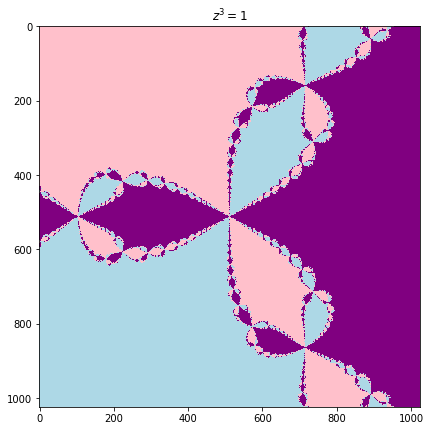

In [14]:
#Need to extract the imaginary part as a real number in order to plot it with imshow()
m = A1.real + A1.imag 

#Crating my own colormap with my favorite colors
colors = ["lightblue", "pink", "purple"]    
cmap = mpl.colors.ListedColormap(colors)      
bounds=[-2,0,0.5,2]                            #bounds to make sure the values get their own color
norm = mpl.colors.BoundaryNorm(bounds, cmap.N) #giving colors to bounds

#Plotting the solutions z^3 = 1
plt.figure(figsize=(10,7))
plt.imshow(m,cmap=cmap,norm=norm)
plt.title(r"$z^3=1$")
plt.show()

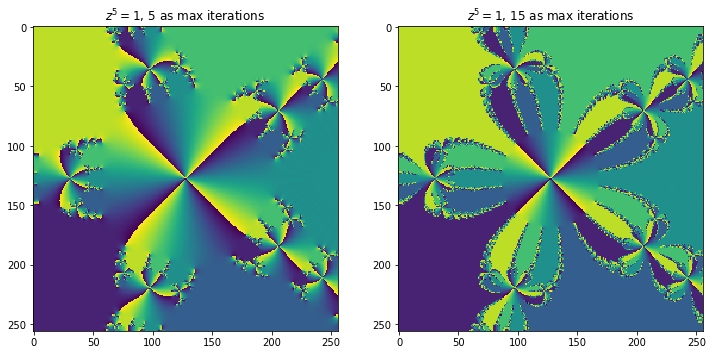

In [15]:
#Plotting the solutions of z^5 = 1 for maximum 5 and 15 iterations, respectively
fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(np.angle(A2))
ax[0].set_title(r"$z^5=1$, 5 as max iterations")
ax[1].imshow(np.angle(A3))
ax[1].set_title(r"$z^5=1$, 15 as max iterations")
plt.show()

Here we see that the image for 15 iterations is better than the one for 5, which is to be exprected, because the values are closer to the roots. 